In [115]:
import numpy as np
from astropy.table import Table
import astropy.io.fits as pyfits
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import corner
import imageio as iio
from datetime import date
today = date.today()

In [116]:
date = '230206'
setup = 'allstar'

In [117]:
data,header = pyfits.getdata('../spectrum_post_processing/galah_dr4_'+setup+'_not_validated.fits', header=True)

In [118]:
description = dict()
# Major identifiers
description['sobject_id'] = 'GALAH identifier'
description['tmass_id'] = '2MASS identifier'
description['gaiadr3_source_id'] = 'Gaia DR3 source_id'
description['ra'] = 'propagated from Gaia DR3'
description['dec'] = 'propagated from Gaia DR3'
description['mjd'] = 'Modified Julian Date'
description['setup'] = 'Analysis setup: single/binary/coadds'
description['best_spec4star'] = 'Best spectrum for given star (identifiable via 2MASS ID)'
description['px_used_perc'] = 'Percentage of spectrum used for spectroscopic fit'
description['comp_time'] = 'Computation time spent on spectrum'
description['survey_name'] = 'HERMES-2dF Survey/Program/Pointing (other if not available)'
description['field_id'] = 'GALAH Field ID (-1 if not available)'

# Main spectroscopic results
description['flag_sp'] = 'Major spectroscopic quality bitmask flag'
description['flag_sp_fit'] = 'Major spectroscopic fitting quality bitmask flag'
description['flag_red'] = 'Quality bitmask flag of reduction pipeline'
description['fit_global_rv'] = 'Are spectra coadded (without RV shifts) and then a global RV fitted?'
description['chi2_sp'] = 'Chi2 value of spectroscopic fitting'
description['model_name'] = 'Neural network model used for creating synthetic spectra'
description['closest_model'] = 'Neural network model closest for Teff/logg/[Fe/H] combination'
description['teff'] = 'Spectroscopic effective temperature (used for fitting)'
description['e_teff'] = 'Uncertainty teff'
description['logg'] = 'Surface gravity adjusted via parallax information'
description['e_logg'] = 'Uncertainty logg_plx'
description['logg_spec'] = 'Spectroscopic surface gravity (used for fitting)'
description['e_logg_spec'] = 'Uncertainty logg_spec'
description['fe_h'] = 'Abundance of Fe and all other elements not fitted in GALAH (Fe: 1D-NLTE)'
description['e_fe_h'] = 'Uncertainty fe_h'
description['flag_fe_h'] = 'Quality flag fe_h'
description['vmic'] = 'Microturbulence velocity (fitted)'
description['e_vmic'] = 'Uncertainty vmic'
description['vsini'] = 'Broadening velocity (fitted sme.vsini with sme.vmac=0)'
description['e_vsini'] = 'Uncertainty of vsini'

description['flux_contr'] = 'Flux contribution of main source'
description['e_flux_contr'] = 'Uncertainty flux_contr'
description['rv_comp_nr'] = 'Number of peaks in RV cross-correlation function (CCF)'
description['rv_comp_1'] = 'Radial velocity of primary source'
description['e_rv_comp_1'] = 'Uncertainty of rv_comp_1'
description['rv_comp_1_h'] = 'Height of rv_comp_1 in CCF'
description['rv_comp_1_p'] = 'Prominence of rv_comp_1 in CCF'
description['rv_comp_2'] = 'Radial velocity of potential secondary source'
description['e_rv_comp_2'] = 'Uncertainty of rv_comp_1'
description['rv_comp_2_h'] = 'Height of rv_comp_1 in CCF'
description['rv_comp_2_p'] = 'Prominence of rv_comp_1 in CCF'
description['rv_gaia_dr3'] = 'Radial velocity in Gaia DR3'
description['e_rv_gaia_dr3'] = 'Uncertainty of rv_gaia_dr3'
description['teff_comp_2'] = 'Spectroscopic effective temperature of potential secondary source'
description['e_teff_comp_2'] = 'Uncertainty of teff_comp_2'
description['logg_comp_2'] = 'Spectroscopic surface gravity of potential secondary source'
description['e_logg_comp_2'] = 'Uncertainty of logg_comp_2'
description['fe_h_comp_2'] = 'Abundance of Fe of potential secondary source'
description['e_fe_h_comp_2'] = 'Uncertainty of fe_h_comp_2'
description['flag_fe_h_comp_2'] = 'Quality flag fe_h_comp_2'
description['vmic_comp_2'] = 'Microturbulence velocity of potential secondary source'
description['e_vmic_comp_2'] = 'Uncertainty of vmic_comp_2'
description['vsini_comp_2'] = 'Broadening velocity of potential secondary source'
description['e_vsini_comp_2'] = 'Uncertainty of vsini_comp_2'

# Elemental abundances
for each in [
    'Li',
    'C',
    'N',
    'O',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Sc',
    'Ti',
    'V',
    'Cr',
    'Mn',
    'Co',
    'Ni',
    'Cu',
    'Zn',
    'Rb',
    'Sr',
    'Y',
    'Zr',
    'Mo',
    'Ru',
    'Ba',
    'La',
    'Ce',
    'Nd',
    'Sm',
    'Eu',
]:
    description[each.lower()+'_fe'] = 'Elemental abundance for ['+each+'/Fe]'
    description['e_'+each.lower()+'_fe'] = 'Uncertainty '+each+'_fe'
    description['flag_'+each.lower()+'_fe'] = 'Quality bitmask flag of '+each+'_fe'

# Reduction information
description['v_bary_eff'] = 'Barycentric velocity applied to reduced spectra'
description['red_rv_ccd'] = 'Reduction pipeline best radial velocity for each CCD'
description['red_e_rv_ccd'] = 'Reduction pipeline uncertainty of red_rv_ccd'
description['red_rv_com'] = 'Reduction pipeline combined best radial velocity'
description['red_e_rv_com'] = 'Reduction pipeline uncertainty of red_rv_com'
description['red_teff'] = 'Reduction pipeline best teff'
description['red_logg'] = 'Reduction pipeline best logg'
description['red_fe_h'] = 'Reduction pipeline best fe_h'
description['red_alpha_fe'] = 'Reduction pipeline best alpha_fe'
description['red_vmic'] = 'Reduction pipeline best vmic'
description['red_vbroad'] = 'Reduction pipeline best vbroad'
description['red_flag'] = 'Reduction pipeline quality bitmask flag'

# Additional parameters of post-processing for binarity, emission, interstellar residuals etc.
description['sb2_rv_16'] = '16th perc. radial velocity of fit to syn-obs residuals'
description['sb2_rv_50'] = '50th perc. radial velocity of fit to syn-obs residuals'
description['sb2_rv_84'] = '84th perc. radial velocity of fit to syn-obs residuals'
description['ew_h_beta'] = 'Equivalent Width of fit for syn-obs residuals at Hbeta core'
description['ew_h_alpha'] = 'Equivalent Width of fit for syn-obs residuals at Halpha core'
description['ew_k_is'] = 'Equivalent Width of fit for K7699 Interstellar Line'
description['sigma_k_is'] = 'Sigma auf Gaussian fit for K7699 Interstellar Line'
description['rv_k_is'] = 'Radial velocity of fit to syn-obs residuals around K7699 line'
description['ew_dib5780'] = 'Equivalent Width of fit for 5780 Diffiuse Interstellar Band'
description['sigma_dib5780'] = 'Sigma auf Gaussian fit for 5780 DIB'
description['rv_dib5780'] = 'Radial velocity of fit to syn-obs residuals around 5780 DIB'
description['ew_dib5797'] = 'Equivalent Width of fit for 5797 Diffiuse Interstellar Band'
description['sigma_dib5797'] = 'Sigma auf Gaussian fit for 5797 DIB'
description['rv_dib5797'] = 'Radial velocity of fit to syn-obs residuals around 5797 DIB'
description['ew_dib6613'] = 'Equivalent Width of fit for 6613 Diffiuse Interstellar Band'
description['sigma_dib6613'] = 'Sigma auf Gaussian fit for 6613 DIB'
description['rv_dib6613'] = 'Radial velocity of fit to syn-obs residuals around 6613 DIB'

description['opt_loop'] = 'Nr of optimisation loops used for fitting'
description['phot_g_mean_mag'] = 'Mean Gaia DR3 G-band apparent magnitude'
description['phot_bp_mean_mag'] = 'Mean Gaia DR3 BP-band apparent magnitude'
description['bp_rp'] = 'Color of BP-RP bands'
description['h_m'] = '2MASS H-band magnitude'
description['h_msigcom'] = 'Uncertainty of h_m'
description['ks_m'] = '2MASS Ks-band magnitude'
description['ks_msigcom'] = 'Uncertainty of ks_m'
description['W2mag'] = 'AllWISE W2-band magnitude'
description['e_W2mag'] = 'uncertainty of W2mag'
description['ebv'] = 'Extinction E(B-V)'
description['parallax'] = 'Astrometric parallax used for GALAH DR4'
description['e_parallax'] = 'Uncertainty of astrometric parallax used for GALAH DR4'
description['parallax_gaia_edr3'] = 'Parallax reported with corrections by Gaia EDR3'
description['e_parallax_gaia_edr3'] = 'Uncertainty of parallax reported with corrections by Gaia EDR3'
description['ruwe_gaia_dr3'] = 'RUWE reported by Gaia DR3'
description['r_med'] = 'Median Distance used for calculating logg(plx)'
description['r_lo'] = 'Lower Limit Distance used for calculating logg(plx)'
description['r_hi'] = 'Higher Limit Distance used for calculating logg(plx)'
description['a_ks'] = 'Attenuation in Ks-band A(Ks) used for calculating logg(plx)'
description['mass'] = 'Mass used for calculating logg(plx)'
description['age'] = 'Age estimated when calculating mass'
description['bc_ks'] = 'Bolometric Correction of Ks, BC(Ks), used for calculating logg(plx)'
description['lbol'] = 'Bolometric Luminosity used for calculating logg(plx)'

for ccd in [1,2,3,4]:
    description['snr_px_ccd'+str(ccd)] = 'Average signal-to-noise ratio (per pixel) of CCD'+str(ccd)

In [119]:
units = dict()
for each in description.keys():
    units[each] = ''
    if each in ['sobject_id','tmass_id','gaiadr3_source_id','setup','best_spec4star',
                'flag_sp','flag_sp_fit','flag_red','chi2_sp','model_name','closest_model',
                'flag_fe_h','flag_fe_h_comp_2','rv_comp_nr',
                'red_flag','flux_contr','e_flux_contr','rv_comp_1_h','rv_comp_2_h','rv_comp_1_p','rv_comp_2_p',
                'snr','survey_name','field_id','opt_loop','ruwe_gaia_dr3','fit_global_rv'
               ]:
        pass
    elif (each[:2] == 'rv') | (each[:4] == 'e_rv'):
        units[each] = 'km s-1'
    elif (each[:4] == 'teff') | (each[-4:] == 'teff') | (each[:6] == 'e_teff'):
        units[each] = 'K'
    elif (each[:4] == 'logg') | (each[-4:] == 'logg') | (each[:6] == 'e_logg'):
        units[each] = 'log(cm.s**-2)'
    elif (each[:4] == 'fe_h') | (each[-4:] == 'fe_h') | (each[:6] == 'e_fe_h'):
        units[each] = 'dex'
    elif (each[:4] == 'vmic') | (each[-4:] == 'vmic') | (each[:6] == 'e_vmic'):
        units[each] = 'km s-1'
    elif (each[:5] == 'vsini') | (each[-5:] == 'vsini') | (each[:7] == 'e_vsini'):
        units[each] = 'km s-1'
    elif each in ['vmic','e_vmic','vsini','e_vsini',
                  'v_bary_eff',
                  'red_rv_ccd','red_e_rv_ccd','red_rv_com','red_e_rv_com',
                  'red_vmic','red_vbroad',
                  'sb2_rv_16','sb2_rv_50','sb2_rv_84','rv_k_is','rv_dib5780','rv_dib5797','rv_dib6613'
                 ]:
        units[each] = 'km s-1'
    elif each in ['ra','dec']:
        units[each] = 'deg'
    elif each[:6] == 'sigma_':
        units[each] = ''
    elif each[:3] == 'ew_':
        units[each] = 'Angstroem'
    elif each[-3:] == '_fe':
        units[each] = 'dex'
    elif each in ['mjd']:
        units[each] = 'd'
    elif each[:3] == 'snr':
        units[each] = ''
    elif each == 'px_used_perc':
        units[each] = '%'
    elif each == 'comp_time':
        units[each] = 's'
    elif each in ['phot_g_mean_mag','phot_bp_mean_mag','bp_rp','h_m','h_msigcom','ks_m','ks_msigcom','W2mag','e_W2mag','ebv','a_ks','bc_ks']:
        units[each] = 'mag'
    elif each in ['parallax','e_parallax','parallax_gaia_edr3','e_parallax_gaia_edr3']:
        units[each] = 'mas'
    elif each in ['r_med','r_lo','r_hi']:
        units[each] = 'pc'
    elif each in ['mass']:
        units[each] = 'solMass'
    elif each in ['age']:
        units[each] = 'Gyr'
    elif each in ['lbol']:
        units[each] = 'solLum'
    else:
        print("'"+each+"',")

In [120]:
# flag_sp_dictionary = dict()

# flag_sp_dictionary['emission']       = [1,'Emission in Halpha/Hbeta detected']
# flag_sp_dictionary['ccd_missing']    = [2,'Not all 4 CCDs available']

# flag_sp_dictionary['is_sb1']         = [4,'Spectroscopic Binary SB1 (RV changes beyond 2sigma)']
# flag_sp_dictionary['is_sb2']         = [8,'Spectroscopic Binary SB2 (Double line splitting)']
# flag_sp_dictionary['chi2_3sigma']    = [16,'Chi2 unusually low/high by 3 sigma']
# flag_sp_dictionary['vsini_warn']     = [32,'Broadening (vsini) warning']
# flag_sp_dictionary['vmic_warn']      = [64,'Microturbulence (vmic) warning']

# flag_sp_dictionary['sb_triple_warn'] = [128,'Double line splitting detected (SB2)']
# flag_sp_dictionary['teff_warn']      = [256,'Temperature (teff) warning']
# flag_sp_dictionary['logg_warn']      = [512,'Gravity (logg) warning']
# flag_sp_dictionary['fe_h_warn']      = [1024,'[Fe/H] (fe_h) warning']
# flag_sp_dictionary['snr_warn']       = [2048,'Signal-to-noise indicates spectra not reliable']
# flag_sp_dictionary['not_converged']  = [4096,'Not converged within 4 iterations']
# flag_sp_dictionary['no_model']       = [8192,'Extrapolating spectrum model']
# flag_sp_dictionary['no_results']     = [16384,'No spectroscopic analysis results available']

# a_file = open("final_flag_sp_dictionary.pkl", "wb")
# pickle.dump(flag_sp_dictionary,a_file)
# a_file.close()

a_file = open("../spectrum_post_processing/final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()

if (flag_sp_dictionary['is_sb1'][0] != 4) | (flag_sp_dictionary['no_results'][0] != 16384):
    raise ValueError('Using inconsistent Flag Sp Dictionary!')

In [121]:
# Double Check for elements without entry
for keys in data.dtype.names:
    if (keys[:4] == 'flag') & (keys[-2:] in ['fe','_h']):
        no_results = data[keys] == -1
        data[keys][no_results] = 2
        
for keys in ['flag_sp_fit']:
    no_results = data[keys] == -1
    data[keys][no_results] = 64
    
    # spectrum['flag_sp'] = np.int32(0)
    # flag_sp_closest_3x3x3_model_not_available = np.int32(1)
    # flag_sp_closest_extra6_model_not_available = np.int32(2)
    # flag_sp_no_successful_convergence_within_maximum_loops = np.int32(4)
    # flag_sp_not_all_ccds_available = np.int32(8)
    # flag_sp_negative_fluxes_in_ccds = np.int32(16)
    # flag_sp_negative_resolution_profile = np.int32(32)
    
for keys in ['flag_fe_h_comp_2']:
    no_results = data[keys] == -1
    data[keys][no_results] = 2

In [122]:
for key in data.dtype.names:    
    if key[:4] == 'flag':
        
        if np.min(data[key]) < 0:
            raise ValueError(key+' has values below 0')
        
#         flag_d = np.array(data[key],dtype=np.float32)
#         flag_d[flag_d==0] = 0.5
#         flag_d = np.log2(flag_d) + 1
        
#         plt.figure()
#         bins=np.arange(np.min(flag_d),np.max(flag_d)+0.01,1)
#         if len(bins) < 3:
#             bins = 3
#         plt.hist(flag_d,bins=bins)
#         plt.title(key)
#         plt.show()
#         plt.close()

In [123]:
# Correction of stars with too low [C/Fe]: That seems to happen if [N/Fe] is not estimated well!
problematic_cn = (
    # [C/N] < -1 for non-giants
    (
        (data['c_fe'] - data['n_fe'] < -1) & # [C/N] < -1
        ~((data['logg'] < 3.5) & (data['teff'] < 5500)) # not_giant
    ) |
    # No [N/Fe] for non-giants
    (
        (data['flag_n_fe'] >= 2) & # no [N/Fe]
        ~((data['logg'] < 3.5) & (data['teff'] < 5500)) # not_giant
    ) |
    (
        # not_extended_giants
        ~(
            (data['teff'] < 5750.) &
            (data['logg'] < 4.)
        ) &
        np.isfinite(data['n_fe'])
    )
)
data['flag_c_fe'][problematic_cn] += 32
data['flag_n_fe'][problematic_cn] += 32
print(len(data['flag_c_fe'][problematic_cn]))

94592


In [124]:
if setup == 'allspec':
    init = Table.read('../spectrum_analysis/galah_dr4_initial_parameters_230101_lite.fits')
    init.sort('sobject_id')
    if len(np.where(init['sobject_id'] == data['sobject_id'])[0]) != len(init['sobject_id']):
        raise ValueError('init sorted by sobject_id != same order/entries as data')
        
    elements_in_ccd = dict()
    elements_in_ccd[3] = ['li','ca','ba']

    for ccd in elements_in_ccd.keys():

        for element in elements_in_ccd[ccd]:

            ccd_issues_and_element_measured = ((
                # cdelt issue
                (init['cdelt_flag'] & 2**(ccd-1) > 0) | # e.g. issue in cdelt of ccd3 = 4, flag 2**(3-1)
                # crval issue
                (init['crval_flag'] & 2**(ccd-1) > 0)
            ) & (data['flag_'+element+'_fe'] & 2**1 == 0))

            data['flag_'+element+'_fe'][ccd_issues_and_element_measured] += 64

In [125]:
len(data['flag_c_fe'][(data['flag_c_fe']<=1)&(data['flag_n_fe']<=1)])

55768

41223


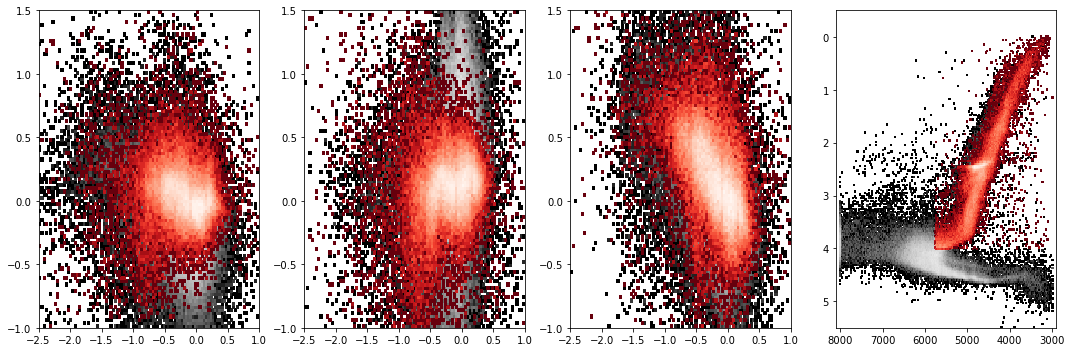

In [126]:
has_xfe = np.isfinite(data['c_fe']) & np.isfinite(data['logg'])

#subset = data['flag_c_fe'] <= 1# ~problematic_cfe
subset = data['flag_c_fe'] == 0# ~problematic_cfe

print(len(data['teff'][subset]))

f, gs = plt.subplots(1,4,figsize=(15,5))

ax=gs[0]
ax.hist2d(
    data['fe_h'][has_xfe],
    data['c_fe'][has_xfe],
    bins = (np.linspace(-2.5,1.0,100),np.linspace(-1,1.5,100)), cmin=1, cmap='Greys_r', norm=LogNorm()
);
ax.hist2d(
    data['fe_h'][subset],
    data['c_fe'][subset],
    bins = (np.linspace(-2.5,1.0,100),np.linspace(-1,1.5,100)), cmin=1, cmap='Reds_r', norm=LogNorm()
);

ax=gs[1]
ax.hist2d(
    data['fe_h'][has_xfe],
    data['n_fe'][has_xfe],
    bins = (np.linspace(-2.5,1.0,100),np.linspace(-1,1.5,100)), cmin=1, cmap='Greys_r', norm=LogNorm()
);
ax.hist2d(
    data['fe_h'][subset],
    data['n_fe'][subset],
    bins = (np.linspace(-2.5,1.0,100),np.linspace(-1,1.5,100)), cmin=1, cmap='Reds_r', norm=LogNorm()
);

ax=gs[2]
ax.hist2d(
    data['fe_h'][has_xfe],
    data['o_fe'][has_xfe],
    bins = (np.linspace(-2.5,1.0,100),np.linspace(-1,1.5,100)), cmin=1, cmap='Greys_r', norm=LogNorm()
);
ax.hist2d(
    data['fe_h'][subset],
    data['o_fe'][subset],
    bins = (np.linspace(-2.5,1.0,100),np.linspace(-1,1.5,100)), cmin=1, cmap='Reds_r', norm=LogNorm()
);

ax=gs[3]
ax.hist2d(
    data['teff'][has_xfe],
    data['logg'][has_xfe],
    bins = (np.linspace(2900,8100,200),np.linspace(-0.5,5.5,200)), cmin=1, cmap='Greys_r', norm=LogNorm()
);
ax.hist2d(
    data['teff'][subset],
    data['logg'][subset],
    bins = (np.linspace(2900,8100,200),np.linspace(-0.5,5.5,200)), cmin=1, cmap='Reds_r', norm=LogNorm()
);
ax.set_xlim(8100,2900)
ax.set_ylim(5.5,-0.5)
plt.tight_layout()

In [127]:
if np.nanmax(data['logg']) > 10:
    data['logg'][data['logg'] == np.nanmax(data['logg'])] = np.NaN
data['logg'] = data['logg'].clip(min=-1,max=5.5)

In [128]:
for each_index, each_key in enumerate(data.dtype.names):
    try:
        header['TTYPE'+str(each_index+1)] = each_key
        header['TUNIT'+str(each_index+1)] = units[each_key]
        header['TCOMM'+str(each_index+1)] = description[each_key]
    except:
        print(each_key)

tbhdu = pyfits.BinTableHDU.from_columns(columns=data,header=header)
tbhdu.writeto('galah_dr4_'+setup+'_'+date+'.fits',overwrite=True)
len(data)

152598

In [129]:
data = Table.read('galah_dr4_'+setup+'_'+date+'.fits')

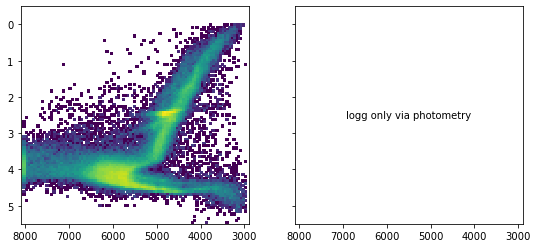

In [130]:
f, gs = plt.subplots(1,2,figsize=(9,4),sharex=True,sharey=True)
ax = gs[0]
ax.hist2d(
    data['teff'],data['logg'],
    bins = (np.linspace(2900,8100,100),np.linspace(-0.5,5.5,100)),norm=LogNorm()
);
ax = gs[1]
if setup == 'allspec':
    ax.hist2d(
        data['teff'],data['logg_spec'],
        bins = (np.linspace(2900,8100,100),np.linspace(-0.5,5.5,100)),norm=LogNorm()
    );
else:
    ax.text(0.5,0.5,'logg only via photometry',ha='center',va='center',transform=ax.transAxes)
ax.set_xlim(8100,2900)
ax.set_ylim(5.5,-0.5);

In [131]:
data['date'] = np.array([str(x)[:6] for x in data['sobject_id']])

In [132]:
fl = Table()
fl['flag_sp_fit'],fl['counts'] = np.unique(data['flag_sp_fit'],return_counts=True)

In [133]:
flag_sp_dictionary

{'emission': [1, 'Emission in Halpha/Hbeta detected'],
 'ccd_missing': [2, 'Not all 4 CCDs available'],
 'is_sb1': [4, 'Spectroscopic Binary SB1 (RV changes beyond 2sigma)'],
 'is_sb2': [8, 'Spectroscopic Binary SB2 (Double line splitting)'],
 'chi2_3sigma': [16, 'Chi2 unusually low/high by 3 sigma'],
 'vsini_warn': [32, 'Broadening (vsini) warning'],
 'vmic_warn': [64, 'Microturbulence (vmic) warning'],
 'sb_triple_warn': [128, 'Double line splitting detected (SB2)'],
 'teff_warn': [256, 'Temperature (teff) warning'],
 'logg_warn': [512, 'Gravity (logg) warning'],
 'fe_h_warn': [1024, '[Fe/H] (fe_h) warning'],
 'snr_warn': [2048, 'Signal-to-noise indicates spectra not reliable'],
 'not_converged': [4096, 'Not converged within 4 iterations'],
 'no_model': [8192, 'Extrapolating spectrum model'],
 'no_results': [16384, 'No spectroscopic analysis results available']}

In [134]:
for flag in np.arange(0,16):
    if flag == 0:
        flag_raised = data['flag_sp'] == 0
        print(0,'no flag',len(data['flag_sp'][flag_raised]))
    else:
        flag_raised = (data['flag_sp'] & 2**(flag-1) > 0)
        print(2**(flag-1),list(flag_sp_dictionary.keys())[flag-1],len(data['flag_sp'][flag_raised]))

0 no flag 112720
1 emission 1134
2 ccd_missing 0
4 is_sb1 6397
8 is_sb2 3676
16 chi2_3sigma 6865
32 vsini_warn 12060
64 vmic_warn 10661
128 sb_triple_warn 0
256 teff_warn 0
512 logg_warn 0
1024 fe_h_warn 0
2048 snr_warn 13633
4096 not_converged 0
8192 no_model 3977
16384 no_results 1981


In [135]:
parsec = Table.read('../auxiliary_information/parsec_isochrones/parsec_isochrones_logt_8p00_0p01_10p17_mh_m2p75_0p25_m0p75_mh_m0p60_0p10_0p70_GaiaEDR3_2MASS.fits')

Flag, Bit, Code
7   ,  64 , vmic_warn


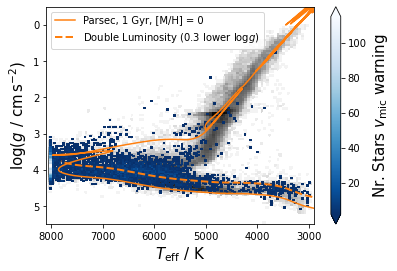

sobject_id,tmass_id,chi2_sp,flag_sp,flag_sp_fit,teff,logg,fe_h,vmic,vsini,ew_h_alpha,mg_fe,r_med,snr_px_ccd1,snr_px_ccd2,snr_px_ccd3,snr_px_ccd4
int64,bytes16,float32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
131216001101006,05242175-5855050,0.7098208,10304,1,3857.6223,4.769166,-1.1987025,0.46914002,12.061349,-0.1651004,0.26878622,153.09885,1.3051765,7.5860133,19.304178,26.898523
131216001101015,05221636-5900200,0.78524035,2112,0,4234.297,4.3414593,-0.45582086,0.25199828,22.231781,0.14703368,0.29337335,433.4099,8.931751,20.4905,33.585712,31.782957
131216001101026,05220701-5904312,1.2988069,76,0,5302.805,4.2982416,-0.5450232,0.2501295,18.999159,-0.31821442,0.21207982,340.55435,54.302757,82.104,112.66131,95.924515
131216001101059,05191171-5903136,1.2916454,108,0,5222.624,4.295575,-0.39689124,0.25002378,26.063217,0.2322143,0.26633844,379.90918,72.97231,105.4299,136.9156,121.99325
131216001101070,05202177-5931387,1.0987293,10304,1,3923.7495,4.6936736,-0.9032644,0.33933672,9.977809,-0.05508702,-0.080086686,152.38461,6.841658,21.694426,42.68619,46.841705
131216001101076,05190904-5919006,0.74820775,10304,1,3882.1226,4.679029,-1.2909424,0.34834307,4.5439935,0.0073418794,0.4993246,192.58018,4.5192676,22.499544,41.80927,44.200687
131216001101101,05172590-5943560,0.9728521,10304,1,3884.514,4.600892,-1.1935073,0.26027656,10.950121,0.19713837,0.28428677,154.00348,9.430766,41.6806,68.923294,68.62238
131216001101122,05161634-5916078,1.1437252,72,0,5280.379,4.1070576,-0.43696785,0.25,24.494202,-0.15396734,0.34326535,763.703,29.99354,45.108215,61.372715,49.472218
131216001101184,05152453-5855256,1.0163438,2112,0,3357.2715,4.6760635,-0.183264,0.47185883,20.258322,-0.6511447,0.26149777,173.2956,2.7070763,12.199028,24.66154,29.290188


In [136]:
flag_bit = 7
flag_raised = (data['flag_sp'] & 2**(flag_bit-1) > 0)
print('Flag, Bit, Code')
print(flag_bit,'  , ',2**(flag_bit-1),',',list(flag_sp_dictionary.keys())[flag_bit-1])

f, ax = plt.subplots()

parsec_selection = (
    (10**(parsec['logAge']-9) > 0.99) &
    (10**(parsec['logAge']-9) < 1.01) &
    (parsec['m_h'] == 0.0)
)

ax.hist2d(
    data['teff'],
    data['logg'],
    bins = (np.linspace(2900,8100,100),np.linspace(-0.5,5.5,100)), cmin=1, norm=LogNorm(), cmap='Greys'
)

h = ax.hist2d(
    data['teff'][flag_raised],
    data['logg'][flag_raised],
    bins = (np.linspace(2900,8100,150),np.linspace(-0.5,5.5,150)), cmin=2,#, vmax = 20,
    cmap = 'Blues_r'
)
cbar = plt.colorbar(h[-1],extend='both')
cbar.set_label(r'Nr. Stars $v_\mathrm{mic}$ warning',fontsize=15)

ax.plot(
    10**parsec['logT'][parsec_selection],
    parsec['logg'][parsec_selection],
    c = 'C1',
    label = 'Parsec, 1 Gyr, [M/H] = 0'
)
ax.plot(
    10**parsec['logT'][parsec_selection][:60],
    parsec['logg'][parsec_selection][:60] - np.log10(2),
    c = 'C1', ls = 'dashed',lw=2,
    label = 'Double Luminosity (0.3 lower $\log g$)'
)
ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}})$',fontsize=15)
ax.legend()
ax.set_xlim(plt.xlim()[::-1])
ax.set_ylim(plt.ylim()[::-1])
plt.show()
plt.close()

data[flag_raised][:10][['sobject_id','tmass_id','chi2_sp','flag_sp','flag_sp_fit','teff','logg','fe_h','vmic','vsini','ew_h_alpha','mg_fe','r_med','snr_px_ccd1','snr_px_ccd2','snr_px_ccd3','snr_px_ccd4']]
# data[flag_raised][['sobject_id','tmass_id','chi2_sp','flag_sp','flag_sp_fit','rv_comp_1','rv_comp_2','sb2_rv_50','sb2_rv_84','teff','logg','fe_h','vmic','vsini','ew_h_alpha','mg_fe','r_med','snr_px_ccd1','snr_px_ccd2','snr_px_ccd3','snr_px_ccd4']]

Flag, Bit, Code
14   ,  8192 , no_model 3977


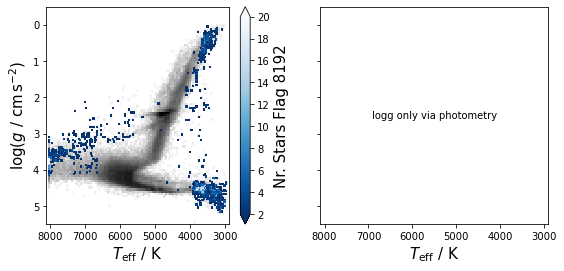

sobject_id,tmass_id,chi2_sp,flag_sp,flag_sp_fit,teff,logg,fe_h,vmic,vsini,ew_h_alpha,mg_fe,r_med,snr_px_ccd1,snr_px_ccd2,snr_px_ccd3,snr_px_ccd4
int64,bytes16,float32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
131216001101006,05242175-5855050,0.7098208,10304,1,3857.6223,4.769166,-1.1987025,0.46914002,12.061349,-0.1651004,0.26878622,153.09885,1.3051765,7.5860133,19.304178,26.898523
131216001101021,05230571-5904150,0.93969595,10240,1,3640.008,4.4548683,-0.5941739,0.7475091,7.9893465,0.363569,-0.03822501,218.69128,8.267657,23.062326,42.091114,44.94617
131216001101027,05204639-5900219,0.6641968,10240,1,3683.2607,4.3980103,-0.7725908,1.5041811,7.8077865,0.3610325,0.11019191,247.72627,3.801695,19.737377,35.894035,35.858963
131216001101070,05202177-5931387,1.0987293,10304,1,3923.7495,4.6936736,-0.9032644,0.33933672,9.977809,-0.05508702,-0.080086686,152.38461,6.841658,21.694426,42.68619,46.841705
131216001101075,05195261-5931548,0.77608365,10240,1,3628.6946,4.6592035,-0.8742541,0.77025634,7.409038,0.32533944,0.26814416,116.586914,2.9839888,21.928324,46.419216,53.962112
131216001101076,05190904-5919006,0.74820775,10304,1,3882.1226,4.679029,-1.2909424,0.34834307,4.5439935,0.0073418794,0.4993246,192.58018,4.5192676,22.499544,41.80927,44.200687
131216001101092,05180895-5925278,0.77037835,10240,1,3650.4573,4.555376,-0.94291514,1.3698208,7.6223884,0.16269425,0.17880912,164.36624,3.0411556,19.098934,39.721653,44.55309
131216001101101,05172590-5943560,0.9728521,10304,1,3884.514,4.600892,-1.1935073,0.26027656,10.950121,0.19713837,0.28428677,154.00348,9.430766,41.6806,68.923294,68.62238
131216001101110,05164885-5926272,0.80100805,10240,1,3152.3398,4.921786,-1.4258648,0.6145639,5.3564405,0.50881875,-0.08026574,91.91552,1.2720469,8.024446,16.879362,17.283592


In [137]:
flag_bit = 14
flag_raised = (data['flag_sp'] & 2**(flag_bit-1) > 0)
print('Flag, Bit, Code')
print(flag_bit,'  , ',2**(flag_bit-1),',',list(flag_sp_dictionary.keys())[flag_bit-1],len(data['teff'][flag_raised]))

f, gs = plt.subplots(1,2,figsize=(9,4),sharex=True,sharey=True)

ax = gs[0]
ax.hist2d(
    data['teff'],
    data['logg'],
    bins = (np.linspace(2900,8100,100),np.linspace(-0.5,5.5,100)), cmin=1, norm=LogNorm(), cmap='Greys'
)

h = ax.hist2d(
    data['teff'][flag_raised],
    data['logg'][flag_raised],
    bins = (np.linspace(2900,8100,150),np.linspace(-0.5,5.5,150)), cmin=2, vmax = 20,
    cmap = 'Blues_r'
)
cbar = plt.colorbar(h[-1],extend='both',ax=ax)
cbar.set_label(r'Nr. Stars Flag '+str(2**(flag_bit-1)),fontsize=15)

ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}})$',fontsize=15)

ax = gs[1]

if setup == 'allspec':
    ax.hist2d(
        data['teff'],
        data['logg_spec'],
        bins = (np.linspace(2900,8100,100),np.linspace(-0.5,5.5,100)), cmin=1, norm=LogNorm(), cmap='Greys'
    )

    h = ax.hist2d(
        data['teff'][flag_raised],
        data['logg_spec'][flag_raised],
        bins = (np.linspace(2900,8100,150),np.linspace(-0.5,5.5,150)), cmin=2, vmax = 20,
        cmap = 'Blues_r'
    )
    cbar = plt.colorbar(h[-1],extend='both',ax=ax)
    cbar.set_label(r'Nr. Stars Flag '+str(2**(flag_bit-1)),fontsize=15)
else:
    ax.text(0.5,0.5,'logg only via photometry',ha='center',va='center',transform=ax.transAxes)

ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)

ax.set_xlim(plt.xlim()[::-1])
ax.set_ylim(plt.ylim()[::-1])

plt.show()
plt.close()
data[flag_raised][:10][['sobject_id','tmass_id','chi2_sp','flag_sp','flag_sp_fit','teff','logg','fe_h','vmic','vsini','ew_h_alpha','mg_fe','r_med','snr_px_ccd1','snr_px_ccd2','snr_px_ccd3','snr_px_ccd4']]


In [138]:
# flag_sp_fit_m1 = (data['flag_sp_fit'] & 64 > 0)
# flag_sp_fit_1 = (data['flag_sp_fit'] & 1 > 0)

# ex_sum = 0

# for year in np.arange(13,24,1):
#     year = str(year)
#     for month in np.arange(1,13):
#         if month < 10:
#             month = '0'+str(month)
#         else:
#             month = str(month)
        
#         sobject_id_in_month = (
#             (data['sobject_id'] > int(year) * 10000000000000 + int(month) * 100000000000) & 
#             (data['sobject_id'] < int(year) * 10000000000000 + (int(month)+1) * 100000000000) &
#             (flag_sp_fit_1)
#         )
        
#         if len(data['sobject_id'][sobject_id_in_month]) > 0:
            
#             ex_sum += len(data['sobject_id'][sobject_id_in_month])
        
#             print(year+month,len(data['sobject_id'][sobject_id_in_month]))
            
#             np.savetxt('../spectrum_analysis/batches/'+year+month+'_ex',data['sobject_id'][sobject_id_in_month],fmt='%s')
            
# print(ex_sum)

In [139]:
schema = [
    ['*Column Name* | *Units* | *Description* | *Data Type* | '],
    [':--------------|:--------------|:------------|:----------|']
]
#star_id |  | 2MASS id   |char[16] | ]
for each_key in data.dtype.names:
    try:
        schema.append([each_key+' | '+str(units[each_key])+' | '+str(description[each_key])+' | '+str(data[each_key].dtype)+' | '])
    except:
        print(each_key)
np.savetxt('schema_galah_dr4_'+setup,np.array(schema),fmt='%s')

date


In [140]:
a_file = open("../spectrum_post_processing/final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()

schema = [
    ['*Bitmask* | *Description* | '],
    [':--------------|:--------------|']
]
schema.append(['0 | No flag rasied | '])
for key in flag_sp_dictionary.keys():
    schema.append([str(flag_sp_dictionary[key][0])+' | '+str(flag_sp_dictionary[key][1])+' | '])
np.savetxt('schema_galah_dr4_flag_sp',np.array(schema),fmt='%s')
schema

[['*Bitmask* | *Description* | '],
 [':--------------|:--------------|'],
 ['0 | No flag rasied | '],
 ['1 | Emission in Halpha/Hbeta detected | '],
 ['2 | Not all 4 CCDs available | '],
 ['4 | Spectroscopic Binary SB1 (RV changes beyond 2sigma) | '],
 ['8 | Spectroscopic Binary SB2 (Double line splitting) | '],
 ['16 | Chi2 unusually low/high by 3 sigma | '],
 ['32 | Broadening (vsini) warning | '],
 ['64 | Microturbulence (vmic) warning | '],
 ['128 | Double line splitting detected (SB2) | '],
 ['256 | Temperature (teff) warning | '],
 ['512 | Gravity (logg) warning | '],
 ['1024 | [Fe/H] (fe_h) warning | '],
 ['2048 | Signal-to-noise indicates spectra not reliable | '],
 ['4096 | Not converged within 4 iterations | '],
 ['8192 | Extrapolating spectrum model | '],
 ['16384 | No spectroscopic analysis results available | ']]

In [141]:
schema = [
    ['*Bitmask* | *Description* | '],
    [':--------------|:--------------|']
]
schema.append(['0 | No flag rasied | '])
schema.append(['1 | Upper limit | '])
schema.append(['2 | No measurement available | '])
schema.append(['4 | No convergence | '])
schema.append(['8 | Measurement above limit: A(Li) > 4; [X/Fe] > 1.5 for C,N,O,Y,Ba,La,Ce,Nd; [X/Fe] > 1.0 for the rest | '])
schema.append(['16 | Measurement below limit: A(Li) < 0; [X/Fe] < -0.5 for Mg, Si, Ti; [X/Fe] < -1.0 for the rest | '])
schema.append(['32 | Measurement issue of CNO | '])
schema.append(['64 | Wavelength issue warning | '])
np.savetxt('schema_galah_dr4_flag_x_fe',np.array(schema),fmt='%s')
schema

[['*Bitmask* | *Description* | '],
 [':--------------|:--------------|'],
 ['0 | No flag rasied | '],
 ['1 | Upper limit | '],
 ['2 | No measurement available | '],
 ['4 | No convergence | '],
 ['8 | Measurement above limit: A(Li) > 4; [X/Fe] > 1.5 for C,N,O,Y,Ba,La,Ce,Nd; [X/Fe] > 1.0 for the rest | '],
 ['16 | Measurement below limit: A(Li) < 0; [X/Fe] < -0.5 for Mg, Si, Ti; [X/Fe] < -1.0 for the rest | '],
 ['32 | Measurement issue of CNO | '],
 ['64 | Wavelength issue warning | ']]

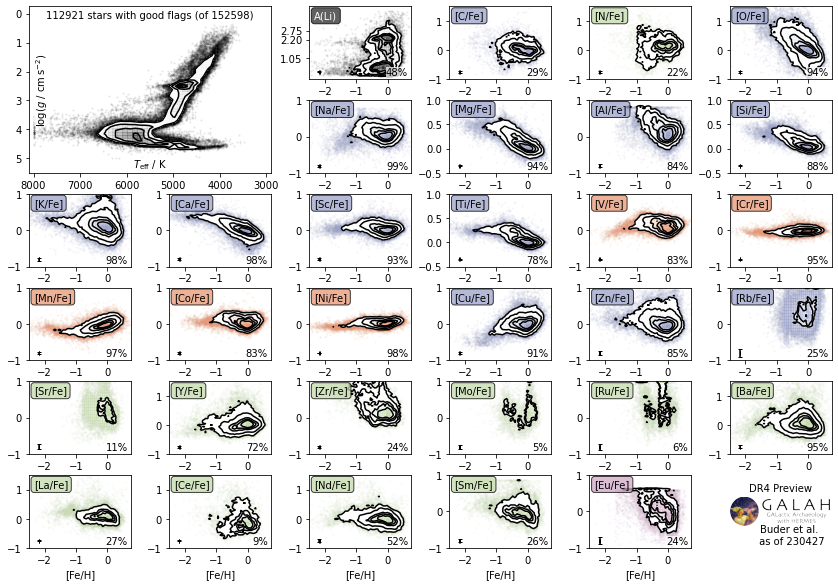

In [142]:
def plot_galah_dr4_overview_A4(data,name):
    elements = [
        'Li',
        'C',
        'N',
        'O',
        'Na',
        'Mg',
        'Al',
        'Si',
        'K',
        'Ca',
        'Sc',
        'Ti',
        'V',
        'Cr',
        'Mn',
        'Co',
        'Ni',
        'Cu',
        'Zn',
        'Rb',
        'Sr',
        'Y',
        'Zr',
        'Mo',
        'Ru',
        'Ba',
        'La',
        'Ce',
        'Nd',
        'Sm',
        'Eu'
        ]

    fig, axs = plt.subplots(ncols=6, nrows=6, figsize=(11.75,8.25))
    gs = axs[0, 0].get_gridspec()
    for ax in axs[0, :2]:
        ax.remove()
    for ax in axs[1, :2]:
        ax.remove()

    # HRD 

    good_bad_flag_cut = 4
    
    flag_sp_0 = data['flag_sp'] < good_bad_flag_cut
    flag_sp_above0_but_results = (data['flag_sp'] >= good_bad_flag_cut) & (data['flag_sp'] < np.max(data['flag_sp']))
    flag_sp_results = data['flag_sp'] < np.max(data['flag_sp'])
    finite_teff_logg = np.isfinite(data['teff']) & np.isfinite(data['logg'])
    
    teff_limits = [2900,8100]
    logg_limits = [-0.25,5.5]

    axbig = fig.add_subplot(gs[:2, :2])
    corner.hist2d(
        data['teff'][flag_sp_0],
        data['logg'][flag_sp_0],
        bins=(np.linspace(teff_limits[0],teff_limits[1],50),np.linspace(logg_limits[0],logg_limits[1],50)),
        range = (teff_limits,logg_limits),
        ax = axbig
    )
    axbig.set_xlim(teff_limits[1],teff_limits[0])
    axbig.set_ylim(logg_limits[1],logg_limits[0])
    if name == 'allspec':
        axbig.text(0.5,0.93,str(len(data['teff'][flag_sp_0]))+r' spectra with good flags (of '+str(len(data['teff']))+')',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    if name == 'allstar':
        axbig.text(0.5,0.93,str(len(data['teff'][flag_sp_0]))+r' stars with good flags (of '+str(len(data['teff']))+')',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    axbig.text(0.5,0.035,r'$T_\mathrm{eff}~/~\mathrm{K}$',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    axbig.text(0.02,0.5,r'$\log (g~/~\mathrm{cm\,s^{-2}})$',transform=axbig.transAxes,va='center',rotation=90,bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))

    # read an image
    img = iio.imread("../spectrum_post_processing/figures/logo_desktop.png")

    ax = axs[-1,-1]
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.5,+1.2,'DR4 Preview',transform=ax.transAxes,ha='center')
    ax.text(0.6,-0.6,'Buder et al. \n as of '+today.strftime("%y%m%d"),transform=ax.transAxes,ha='center')

    for ind, label in enumerate(elements):    
        if ind <= 3:
            ax = axs[0,2+ind]
        elif ind <= 7:
            ax = axs[1,2+ind-4]
        elif ind <= 13:
            ax = axs[2,ind-8]
        elif ind <= 19:
            ax = axs[3,ind-14]
        elif ind <= 25:
            ax = axs[4,ind-20]
        elif ind <= 32:
            ax = axs[5,ind-26]
        else:
            raise ValueError('blob')
        if label == 'Li':
            color = '#2B292C'
        elif label in ['C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Cu','Zn','Rb']:
            color = '#9AA2C9'
        elif label in ['V','Cr','Mn','Fe','Co','Ni']:
            color = '#E69774'
        elif label in ['N','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm']:
            color = '#C4DAAB'
        elif label in ['Eu']:
            color = '#D0A8C5'

        xbins = np.linspace(-2.5,0.75,50)
        if label == 'Li':
            ybins = np.linspace(-0.25,4.25,50)
        elif label in ['C','N','O','Y','Ba','La','Ce','Nd']:
            ybins = np.linspace(-1,1.5,50)
        elif label in ['Mg','Si','Ti']:
            ybins = np.linspace(-0.5,1,50)
        else:
            ybins = np.linspace(-1,1,50)

        # First panel: Detections for GALAH DR4 [Fe/H] vs. [X/Fe]
        if label == 'Li':
            textcolor = 'w'
            ax.set_yticks([1.05,2.2,2.75])
        else:
            textcolor = 'k'

        flag0 = flag_sp_0 & (data['flag_'+label.lower()+'_fe'] == 0) #& (data['fe_h'] > -1)

        if label == 'Li':
            ax.text(0.05,0.83,'A('+label+')',ha='left',color=textcolor, transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='round', facecolor=color, alpha=0.75))
        else:
            ax.text(0.05,0.83,'['+label+'/Fe]',ha='left',color=textcolor, transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='round', facecolor=color, alpha=0.75))
        ax.text(0.97,0.05,"{:.0f}".format(100*len(data['e_fe_h'][flag0])/len(data['teff'][flag_sp_0]))+'%',ha='right', transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='square,pad=0',lw=0,facecolor='w', alpha=0.75))

        levels = (0.97,0.9,0.68,0.5,0.3)
        if label in ['La','Ce','Sm','Eu']:
            levels = (0.9,0.68,0.5,0.3)
        elif label in ['Rb','Sr','Mo','Ru']:
            levels = (0.5,0.3)
            
        ydata = data[label.lower()+'_fe'][flag0]
        if label == 'Li':
            ydata = data[label.lower()+'_fe'][flag0] + data['fe_h'][flag0] + 1.05
            
        #if (len(data['fe_h'][flag0]) > 20) & (label != 'Rb'):
        corner.hist2d(
            data['fe_h'][flag0],
            ydata,
            bins = (xbins,ybins),
            levels = levels,
            contour_kwargs=dict(colors=['k']),
            color=color,
            range=[(xbins[0],xbins[-1]),(ybins[0],ybins[-1])],
            ax = ax
        )
        ax.set_xlim(xbins[0],xbins[-1])
        ax.set_ylim(ybins[0],ybins[-1])
        ax.errorbar(
            0.9*xbins[0]+0.1*xbins[-1],
            0.9*ybins[0]+0.1*ybins[-1],
            xerr=np.ma.median(data['e_fe_h'][flag0]),
            yerr=np.ma.median(data['e_'+label.lower()+'_fe'][flag0]),
            capsize=2,color='k'
        )
        if ind >= 26:
            ax.set_xlabel('[Fe/H]')
    #     else:
        ax.set_xticks([-2,-1,0])
    plt.tight_layout(h_pad=0,w_pad=0)
    plt.savefig('../spectrum_post_processing/figures/galah_dr4_overview_'+name+'.png',dpi=150,bbox_inches='tight')
    plt.show()
    plt.close()

plot_galah_dr4_overview_A4(data=data,name=setup)